In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [5]:
df=pd.read_csv("SBI_Life_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
df.shape

(1338, 8)

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
df.tail()

In [ ]:
df.dtypes

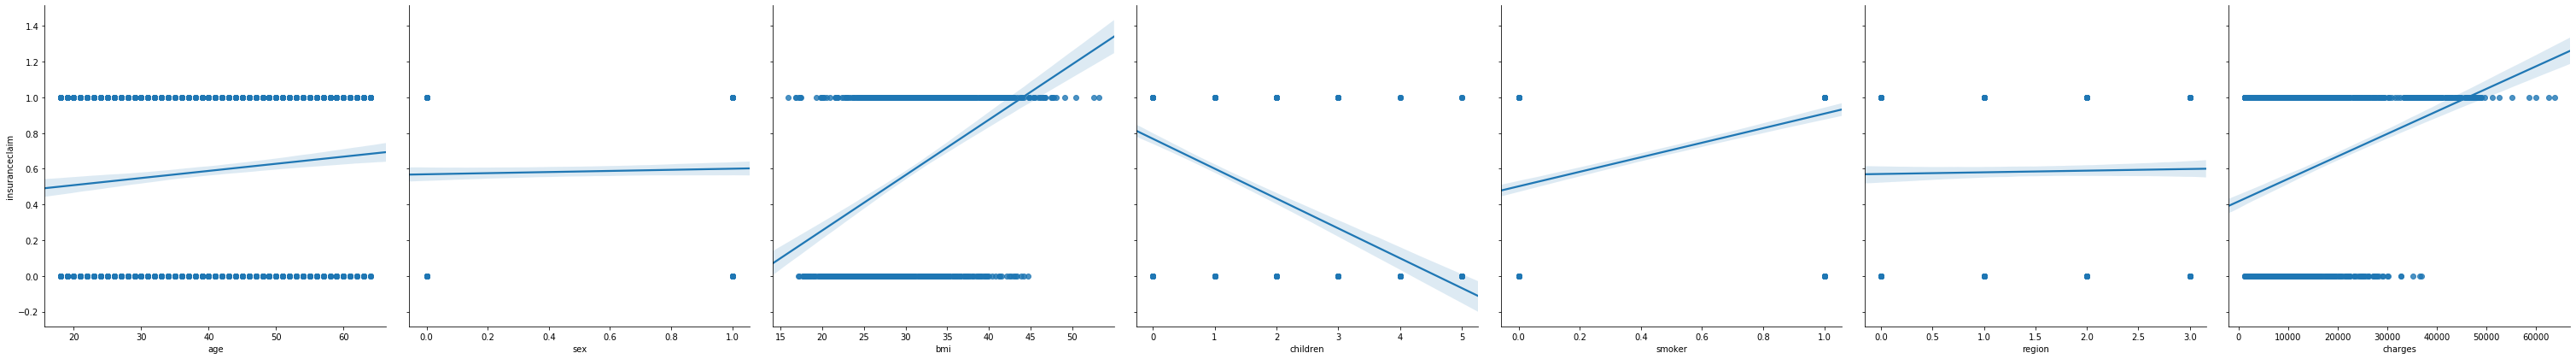

In [13]:
import seaborn as sns
sns.pairplot(df,x_vars=['age','sex','bmi','children','smoker',
                        'region','charges'],y_vars='insuranceclaim',size=6,kind='reg')

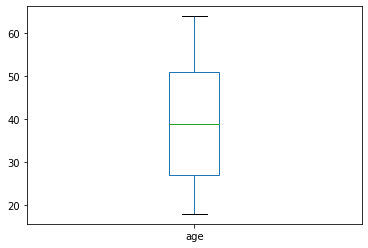

In [14]:
df['age'].plot.box()

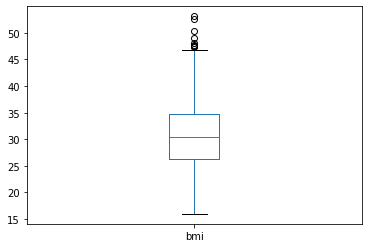

In [15]:
df['bmi'].plot.box()

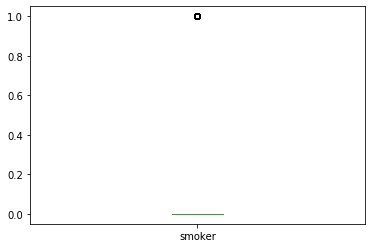

In [16]:
df['smoker'].plot.box()

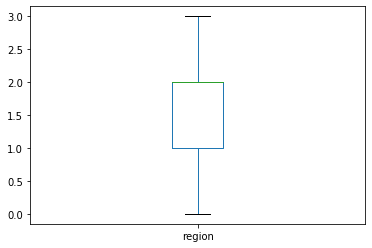

In [17]:
df['region'].plot.box()

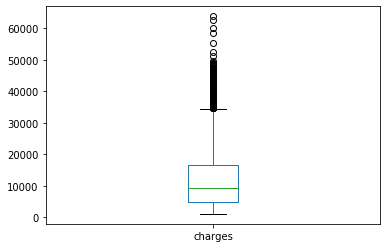

In [18]:
df['charges'].plot.box()

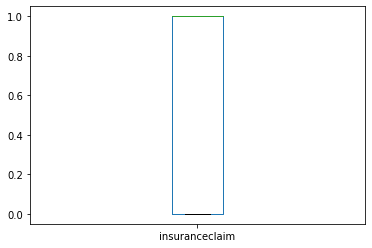

In [19]:
df['insuranceclaim'].plot.box()

In [20]:
x=df.iloc[:,0:-1]
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [22]:
x.shape

(1338, 7)

In [23]:
y.shape

(1338,)

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


0.7728813559322034
[[ 82  54]
 [ 13 146]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       136
           1       0.73      0.92      0.81       159

    accuracy                           0.77       295
   macro avg       0.80      0.76      0.76       295
weighted avg       0.79      0.77      0.77       295



In [28]:
gnb=GaussianNB()


In [29]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8169491525423729
[[123  13]
 [ 41 118]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       136
           1       0.90      0.74      0.81       159

    accuracy                           0.82       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.82      0.82       295



In [30]:
svc=SVC()

In [31]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5694915254237288
[[ 11 125]
 [  2 157]]
              precision    recall  f1-score   support

           0       0.85      0.08      0.15       136
           1       0.56      0.99      0.71       159

    accuracy                           0.57       295
   macro avg       0.70      0.53      0.43       295
weighted avg       0.69      0.57      0.45       295



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt=DecisionTreeClassifier()

In [33]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9932203389830508
[[136   0]
 [  2 157]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       136
           1       1.00      0.99      0.99       159

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295



In [34]:
rbf=RandomForestClassifier()

In [35]:
rbf.fit(x_train,y_train)
rbf.score(x_train,y_train)
predrbf=dt.predict(x_test)
print(accuracy_score(y_test,predrbf))
print(confusion_matrix(y_test,predrbf))
print(classification_report(y_test,predrbf))

0.9932203389830508
[[136   0]
 [  2 157]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       136
           1       1.00      0.99      0.99       159

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295



we can say from above result RBF Classifier and DecisionTree Classifier gives 99% Accuracy Score